# SVM Personal

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
import scipy.sparse as sp

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.metrics
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import sklearn.svm
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

from os import listdir, walk
from os.path import isfile, join, relpath

import scipy
from scipy.io import arff
import arff
from io import StringIO
import math

import warnings
#warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
from prettytable import PrettyTable

svm_feature_imp and svm_feature function is used to plot the feature importance graph. Note: Only linear kernel can be used for this.
Link Reference: https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

In [2]:
def svm_feature_imp(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    #print(imp + names)
    #print(names[-10:])
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [3]:
def svm_feature(X,y):
    features_names = ["X0","X1","X2","X3","X4","X5","X6","X7","X8","X9","Y0","Y1","Y2","Y3","Y4","Y5","Y6","Y7","Y8","Y9","Z0","Z1","Z2","Z3","Z4","Z5","Z6","Z7","Z8","Z9","XAVG","YAVG","ZAVG","XPEAK","YPEAK","ZPEAK","XABSOLDEV","YABSOLDEV","ZABSOLDEV","XSTANDDEV","YSTANDDEV","ZSTANDDEV","RESULTANT"] 
    svm = sklearn.svm.SVC(kernel='linear')
    svm.fit(X, y.ravel())
    plt.figure(figsize=(20,10))
    names = svm_feature_imp(svm.coef_[0], features_names)

Read all the files

In [4]:
file_dict = {0 : "Phone Accel" , 1:"Watch Accel", 2:"Phone Gyro", 3:"Watch Gyro"}

In [5]:
file1 = ["./data/transformed_data/phone/accel/" + f for f in listdir("./data/transformed_data/phone/accel/") if f.endswith('.csv')]
file2 = ["./data/transformed_data/watch/accel/" + f for f in listdir("./data/transformed_data/watch/accel/") if f.endswith('.csv')]
file3 = ["./data/transformed_data/phone/gyro/" + f for f in listdir("./data/transformed_data/phone/gyro/") if f.endswith('.csv')]
file4 = ["./data/transformed_data/watch/gyro/" + f for f in listdir("./data/transformed_data/watch/gyro/") if f.endswith('.csv')]
files = [file1] + [file2] + [file3] + [file4]
print (files)

[['./data/transformed_data/phone/accel/data_1635_accel_phone.csv', './data/transformed_data/phone/accel/data_1608_accel_phone.csv', './data/transformed_data/phone/accel/data_1611_accel_phone.csv', './data/transformed_data/phone/accel/data_1623_accel_phone.csv', './data/transformed_data/phone/accel/data_1607_accel_phone.csv', './data/transformed_data/phone/accel/data_1640_accel_phone.csv', './data/transformed_data/phone/accel/data_1647_accel_phone.csv', './data/transformed_data/phone/accel/data_1600_accel_phone.csv', './data/transformed_data/phone/accel/data_1624_accel_phone.csv', './data/transformed_data/phone/accel/data_1619_accel_phone.csv', './data/transformed_data/phone/accel/data_1616_accel_phone.csv', './data/transformed_data/phone/accel/data_1648_accel_phone.csv', './data/transformed_data/phone/accel/data_1632_accel_phone.csv', './data/transformed_data/phone/accel/data_1601_accel_phone.csv', './data/transformed_data/phone/accel/data_1646_accel_phone.csv', './data/transformed_dat

Activity names dictionary for printing the activity specific table

In [6]:
activity_names = {"A":"Walking","B":"Jogging","C":"Stairs","D":"Sitting","E":"Standing","F":"Typing","G":"Brushing Teeth","H":"Eating Soup","I":"Eating Chips","J":"Eating Pasta","K":"Drinking from Cup","L":"Eating Sandwich","M":"Kicking Soccer Ball","O":"Playing Catch w/Tennis Ball","P":"Dribbling (Basketball)","Q":"Writing","R":"Clapping","S":"Folding Clothes"}

In [7]:
print(activity_names)

{'A': 'Walking', 'B': 'Jogging', 'C': 'Stairs', 'D': 'Sitting', 'E': 'Standing', 'F': 'Typing', 'G': 'Brushing Teeth', 'H': 'Eating Soup', 'I': 'Eating Chips', 'J': 'Eating Pasta', 'K': 'Drinking from Cup', 'L': 'Eating Sandwich', 'M': 'Kicking Soccer Ball', 'O': 'Playing Catch w/Tennis Ball', 'P': 'Dribbling (Basketball)', 'Q': 'Writing', 'R': 'Clapping', 'S': 'Folding Clothes'}


Calculating the TP, FP, FN, TN from the confusion matrix

In [8]:
def calculate_cf(confusion_mat, i=0, to_print=True):
    TP = confusion_mat[i,i]  
    FP = confusion_mat[:,i].sum() - TP  
    FN = confusion_mat[i,:].sum() - TP  
    TN = confusion_mat.sum().sum() - TP - FP - FN
    return TP, FP, FN, TN

./data/transformed_data/phone/accel/data_1635_accel_phone.csv


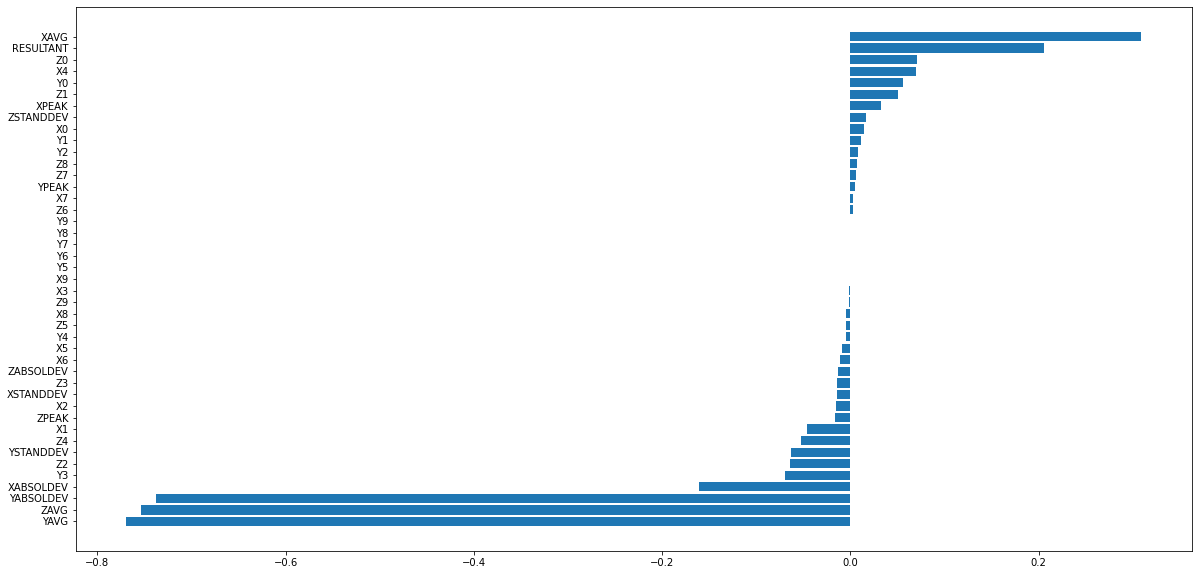

{'C': 100.0, 'coef0': 0.1, 'degree': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6


/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

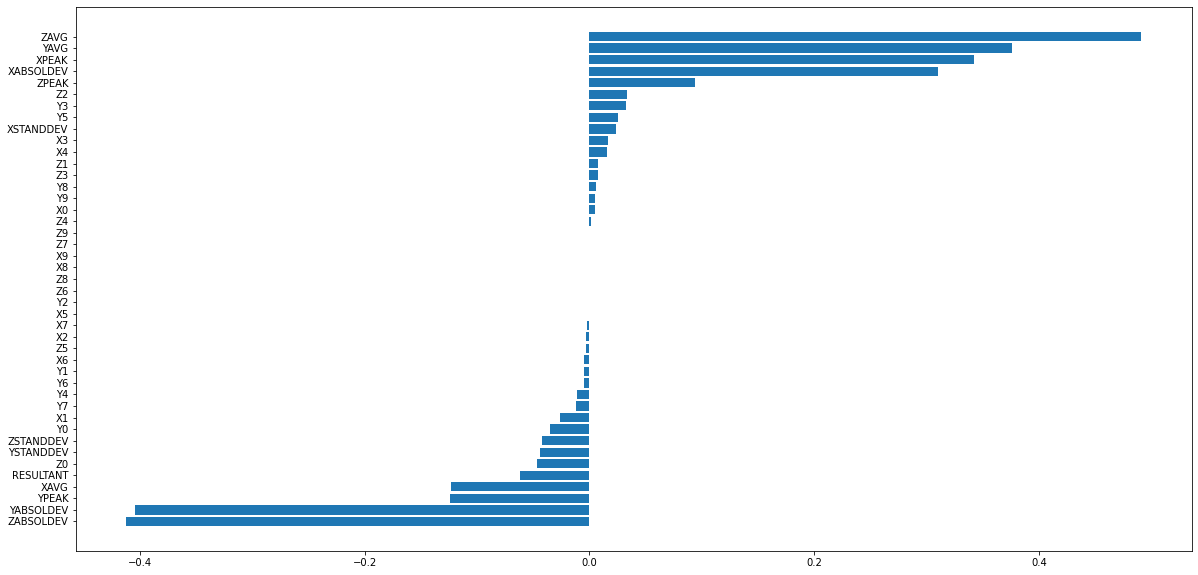

{'C': 10.0, 'coef0': 0.1, 'degree': 1.0, 'gamma': 'auto', 'kernel': 'poly'}
[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 6 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       0.75      1.00      0.86         3
           7       1.00      0.50      0.67      

/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

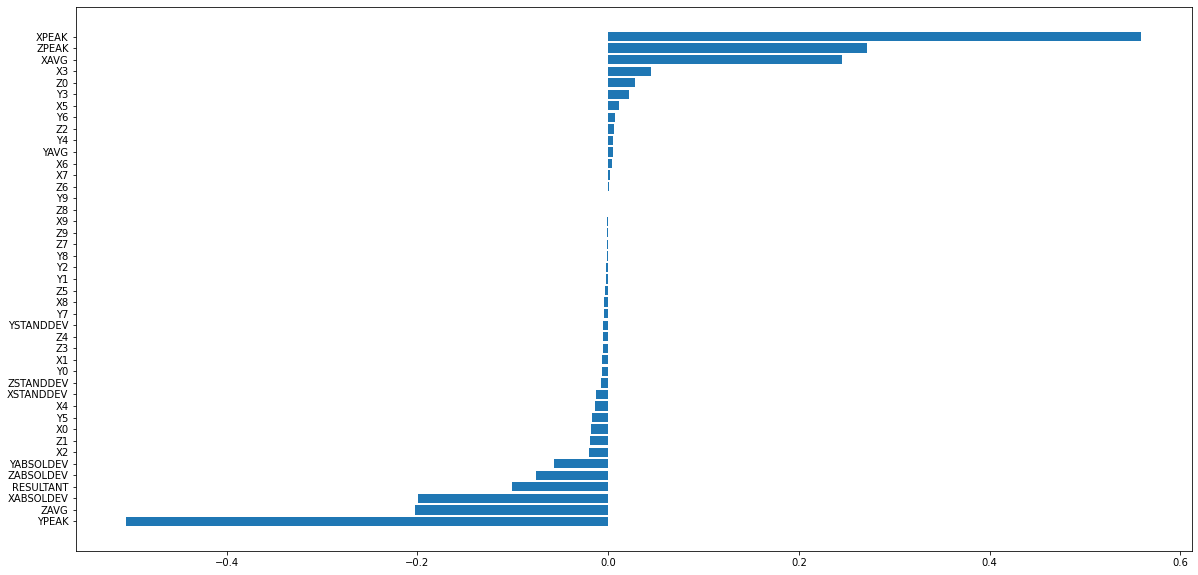

{'C': 10.0, 'coef0': 0.1, 'degree': 1.0, 'gamma': 'auto', 'kernel': 'poly'}
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67      

/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

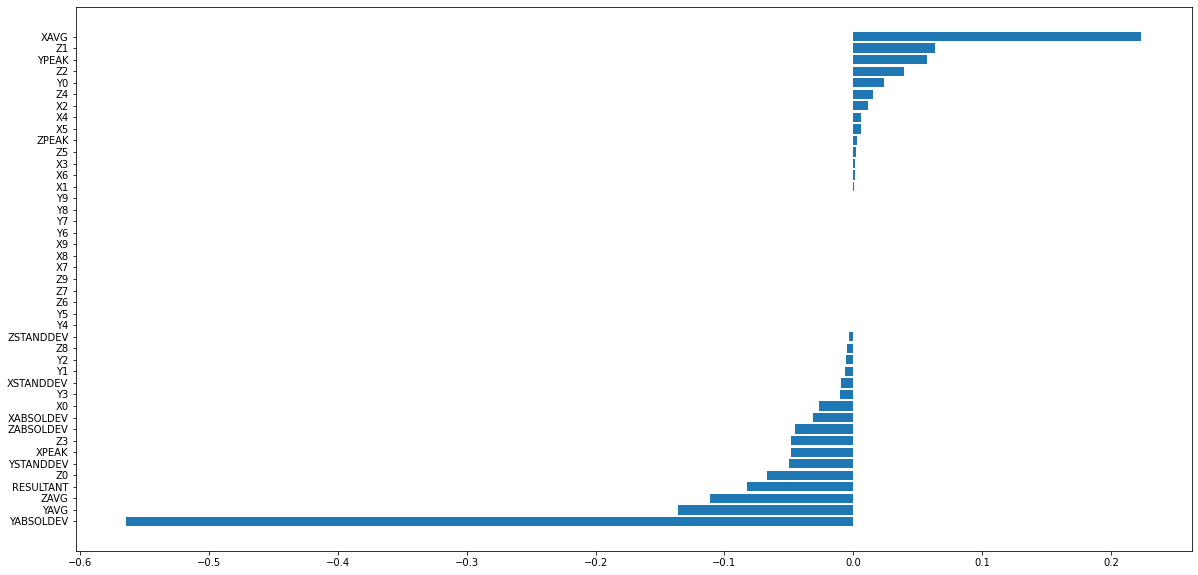

{'C': 1000.0, 'coef0': 0.1, 'degree': 1.0, 'gamma': 'auto', 'kernel': 'poly'}
[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00   

/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

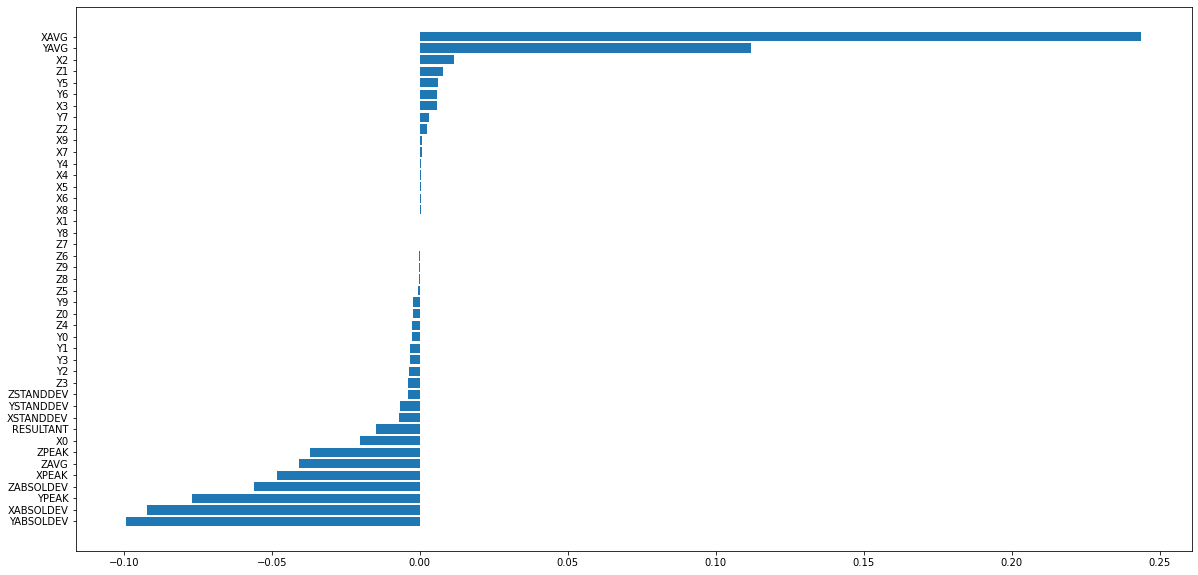

{'C': 10.0, 'coef0': 0.1, 'degree': 1.0, 'gamma': 'auto', 'kernel': 'poly'}
[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      0.50      0.67         2
           6       0.67      1.00     

/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

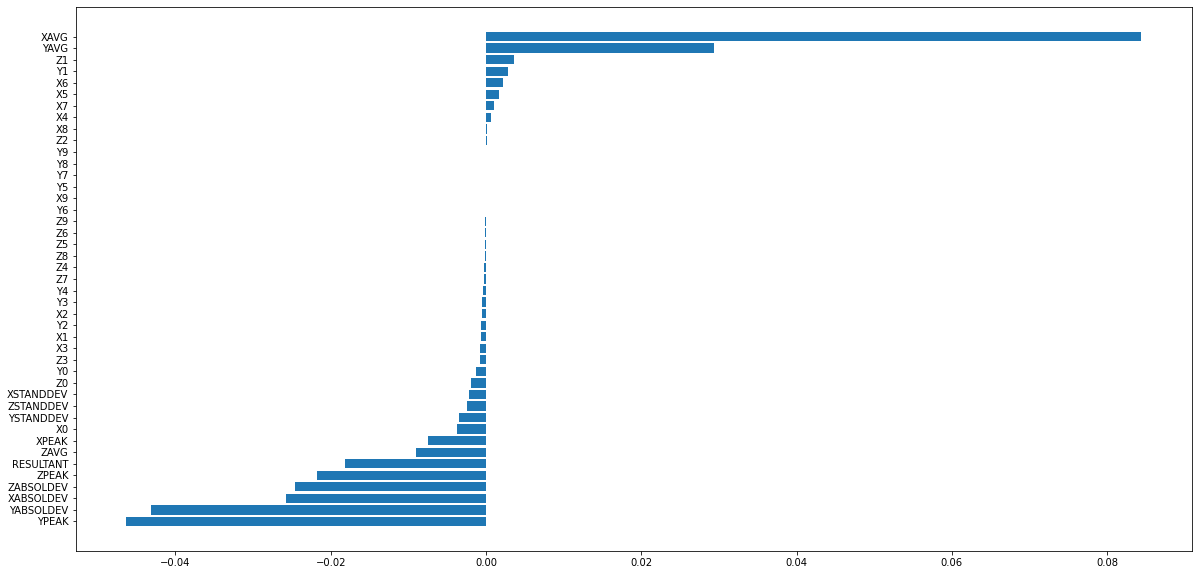

{'C': 10.0, 'coef0': 0.1, 'degree': 1.0, 'gamma': 'auto', 'kernel': 'poly'}
[[2 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         3
           2       0.67      0.50      0.57         4
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00     

/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

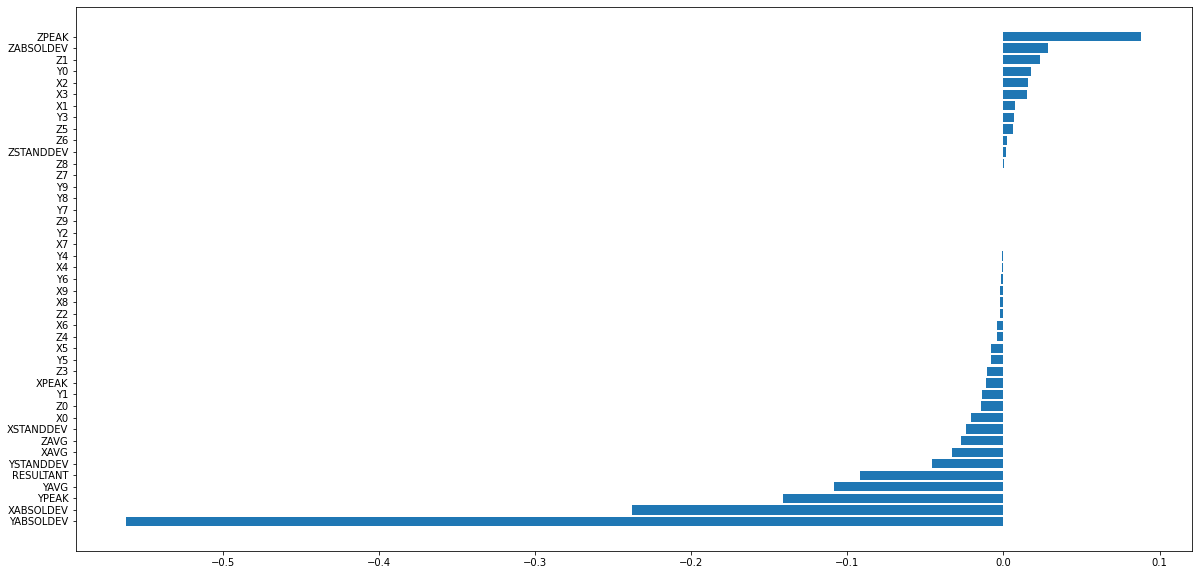

{'C': 1000.0, 'coef0': 0.1, 'degree': 1.0, 'gamma': 'auto', 'kernel': 'poly'}
[[2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         1
           3       1.00      0.67      0.80         3
           4       1.00      0.67      0.80         3
           5       0.33      0.50      0.40         2
           6       0.67      1.00      0.80         2
           8       0.00      0.00      0.00         3
           9       1.00      1.00      1.00         3


/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

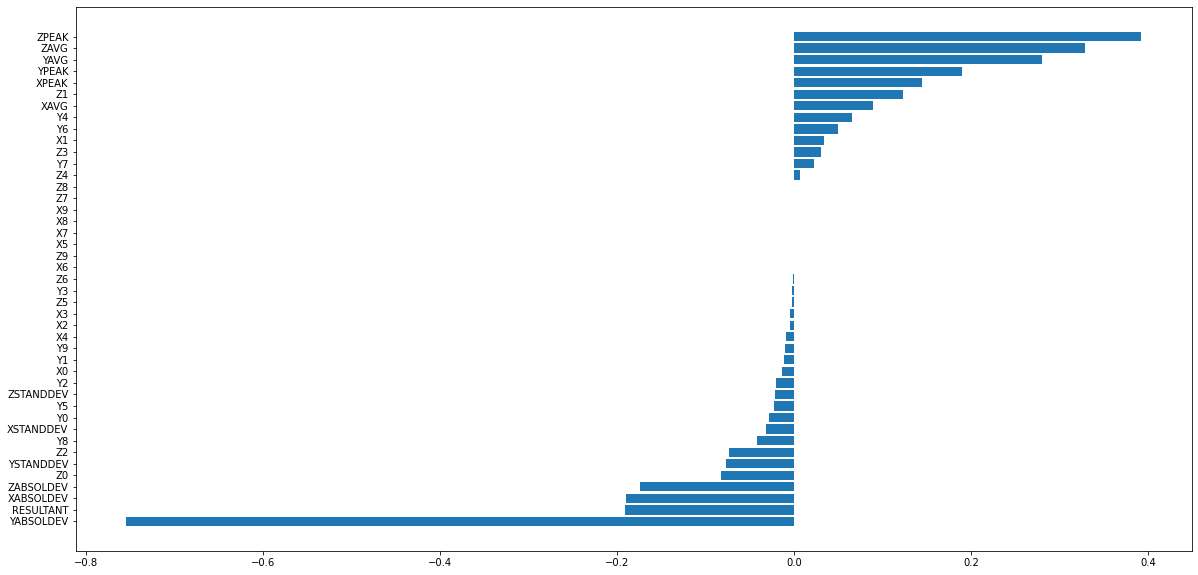

{'C': 100.0, 'coef0': 0.1, 'degree': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00 

/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

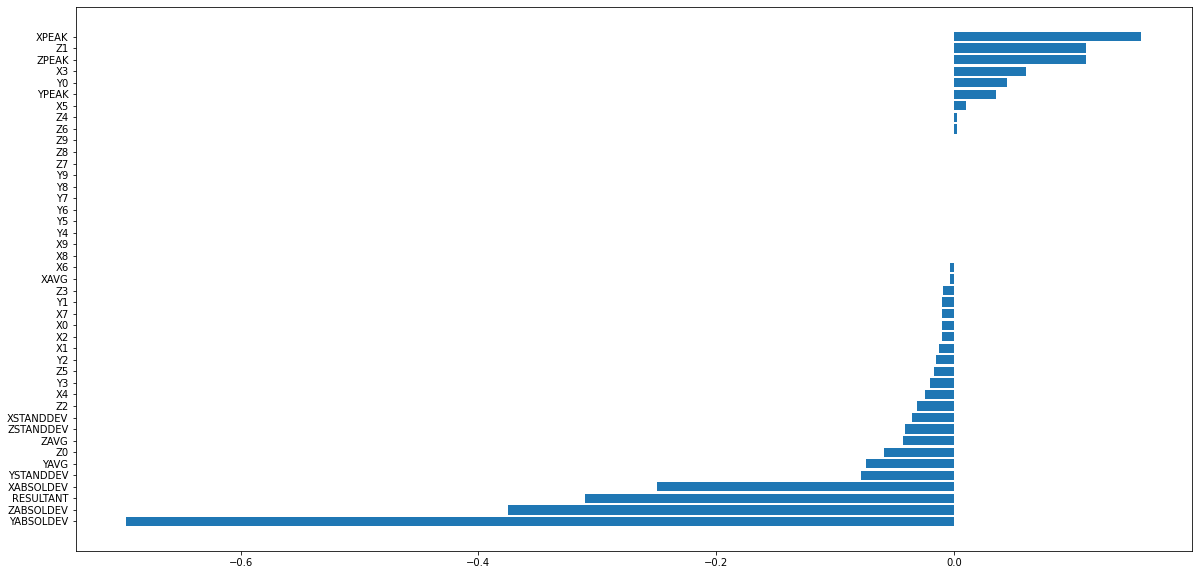

{'C': 1000.0, 'coef0': 0.1, 'degree': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         3
           3       0.20      1.00      0.33         1
           4       1.00      1.00      1.00         1
           5       0.33      1.00      0.50         2
           6       0.00      0.00      0.00 

/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaishnavi/opt/anaconda3/envs/wireless/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

[[0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 2 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.80      1.00      0.89         4
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.14      1.00      0.25         1
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         4
           9       1.00      0.50      0.67         2
          10       0.00      0.00      0.00         0
          11       0.00    

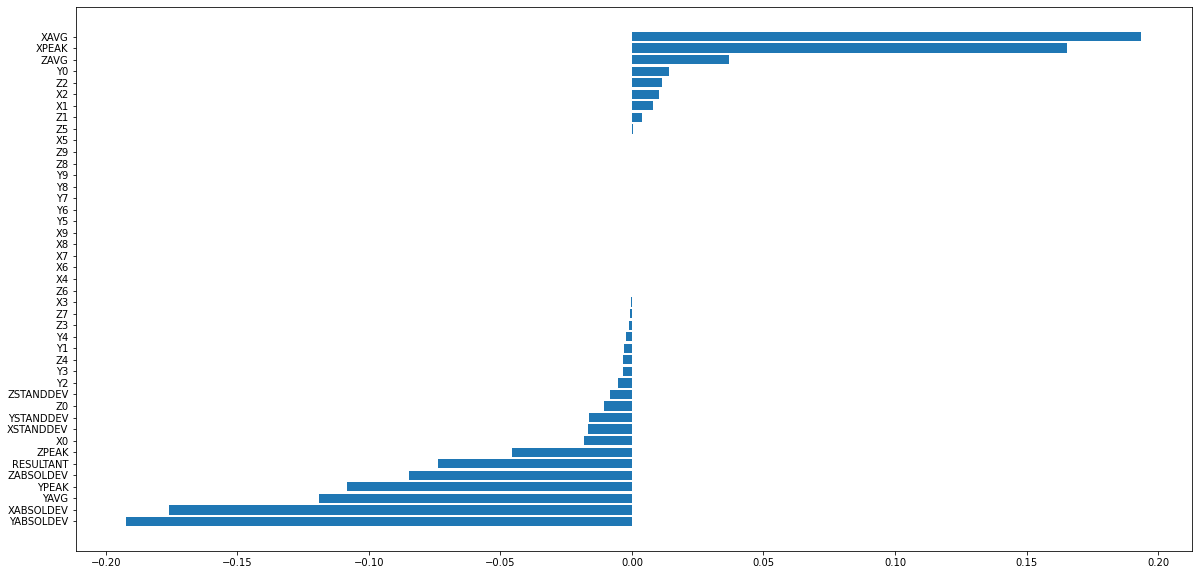

KeyboardInterrupt: 

In [9]:
kf = KFold(shuffle=True, n_splits=10) #Using 10 cross validation

#Loop for taking each dataset in sequence

for fileindex,filelist in enumerate(files):
    overall_acc_dic = {}
    overall_precision_dic = {}
    overall_recall_dic = {}
    overall_f1_dic = {}
    overall_acc_list = []
    
    #For each list of file under each type of data i.e, Phone accel, Watch accel, Phone gyro and Watch gyro
    for csvfile in filelist:
        print(csvfile)
        
        #Using pandas to read the content of the CSV file
        data = pd.read_csv(csvfile, verbose=False)

        
        #Selecting only the 43 features which are mentioned in Weiss paper
        X1 = data.loc[:, "X0":"ZSTANDDEV"]
        X2 = data.loc[:, 'RESULTANT']   
        y = data.loc[:, "ACTIVITY"]

        
        #This will find the subject id from the file name
        if (fileindex == 0 or fileindex == 1):
            subject_id = (csvfile.split('accel'))[1].split('_')[1]
        else:
            subject_id = (csvfile.split('gyro'))[1].split('_')[1]

        
        #Using scalar to scale the training set and label encoder to encode the value for activity which is string
        scaler = StandardScaler()
        le = preprocessing.LabelEncoder()

        
        #Using np.column.stack to stack 43 features
        X = np.column_stack((np.array(X1),np.array(X2)))
        #X = scaler.fit_transform(X)

        #X_raw = np.column_stack((np.array(X1),np.array(X2)))
        y = le.fit_transform(y)

        
        #Finding the encoded labels for each activity and storing the details in dictionary to print the table
        le_name_mapping = dict(zip(le.transform(le.classes_),le.classes_))
        #name_le_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
        #print(le_name_mapping)

        
        #Function to plot feature importance. Removed the code where we column stack only the features which was out put of this function
        svm_feature(X,y)

        
        #Hyperparameter search for the following paramters to train SVM
        param_grid={
        "kernel":('linear', 'rbf','poly','sigmoid'),
              "C": np.logspace(0, 3, 4),
              "degree": np.logspace(-2, 1, 4),
              "coef0": [0.1, 1],
              "gamma": ("auto", "scale")
        }

        #k_fold_model = sklearn.model_selection.StratifiedKFold(10, random_state=0)
        SVC = sklearn.svm.SVC()
        grid_search_cv = sklearn.model_selection.GridSearchCV(SVC, param_grid, cv=10, n_jobs=10)
        grid_search_cv.fit(X, y)
        print(grid_search_cv.best_params_)
        C_val = grid_search_cv.best_params_['C']
        gamma_val = grid_search_cv.best_params_['gamma']
        coef0_val = grid_search_cv.best_params_['coef0']
        kernel_val = grid_search_cv.best_params_['kernel']
        degree_val = grid_search_cv.best_params_['degree']
        
        
        #Initialising some paramters to calculate average scores for 10 cross iterations
        accuracies = []
        iteration = 1
        label_acc_dic = {}
        label_precision_dic = {}
        label_recall_dic = {}
        label_f1_dic = {}
        target_name_list = []
        y_labels=list(set(y))
        for j in y_labels:
            #target_name_list.append(activity_names[le_name_mapping[j]])
            target_name_list.append(le_name_mapping[j])
        #print(target_name_list)

        
        #Splitting the data into train and test. Train the training set with SVM classifier. Use the grid search output
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index] 
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.fit_transform(X_test)
            y_train, y_test = y[train_index], y[test_index]
            clf = svm.SVC(C=C_val, coef0=coef0_val, degree=degree_val, gamma=gamma_val, kernel=kernel_val)
            #clf = svm.SVC(C=0.5, coef0=1, degree=10, gamma='scale', kernel='poly')
            clf.fit(X_train,y_train)
            y_pred = clf.predict(X_test)
            acc = sklearn.metrics.accuracy_score(y_test, y_pred)

            labels=list(set(y_pred))
            
            #Print the confusion matrix for each iteration of 10 cross validation
            cf = sklearn.metrics.confusion_matrix(y_test, y_pred,labels=labels)
            print(cf)
            
            #Calculate accuracy, precision, recall and f1 measure for each activity 
            i = 0
            for label in labels:
                #print('Calculating 2x2 contigency table for label{}'.format(i))
                TP, FP, FN, TN = calculate_cf(cf, i, to_print=True)
                i +=1
                decode_label = le_name_mapping[label]
                #print(decode_label)
                #print(label_acc_dic)
                if decode_label in label_acc_dic:
                    temp_acc_list = label_acc_dic[decode_label]
                    temp_precision_list = label_precision_dic[decode_label]
                    temp_recall_list = label_recall_dic[decode_label]
                    temp_f1_list = label_f1_dic[decode_label]
                    label_acc_dic[decode_label] = temp_acc_list + [((TP+TN)/(TP+FP+FN+TN))*100]
                    #print(label_acc_dic[decode_label])
                    if TP != 0:
                        label_precision_dic[decode_label] = temp_precision_list + [(TP)/(TP+FP)]
                        label_recall_dic[decode_label] = temp_recall_list + [(TP)/(TP+FN)]
                        label_f1_dic[decode_label] = temp_f1_list + [(TP)/(TP+ (0.5 *(FP+FN)))]
                    else:
                        label_precision_dic[decode_label] = temp_precision_list + [0]
                        label_recall_dic[decode_label] = temp_recall_list + [0]
                        label_f1_dic[decode_label] = temp_f1_list + [0]
                else:
                    label_acc_dic[decode_label] = [((TP+TN)/(TP+FP+FN+TN))*100]
                    if TP != 0:
                        label_precision_dic[decode_label] = [(TP)/(TP+FP)]
                        label_recall_dic[decode_label] = [(TP)/(TP+FN)]
                        label_f1_dic[decode_label] = [(TP)/(TP+ (0.5 *(FP+FN)))]
                    else:
                        label_precision_dic[decode_label] = [0]
                        label_recall_dic[decode_label] = [0]
                        label_f1_dic[decode_label] = [0]


            #Print the classification report
            print(classification_report(y_test, y_pred))
            
            #Print the average iteration accuracy
            accuracies.append(acc)
            print(f"Iteration {iteration}: {100*acc:.2f} %")
            iteration +=1


        #Get the average precision, accuracy, recall and f1-measure for each activity of the iterations
        sum_a = 0
        for i in accuracies:
            sum_a += i
        ave_accu = sum_a/len(accuracies)
        print(f"Average accuracy: {(ave_accu*100):.2f} %")

        for key in label_acc_dic:
            sum_acc_key = 0
            temp_list = label_acc_dic[key]
            #print(sum(temp_list))
            for i in temp_list:
                sum_acc_key += i

            if sum_acc_key != 0:
                label_acc_dic[key] = round(sum_acc_key/len(temp_list),2)
            else:
                label_acc_dic[key] = 0
            #t = PrettyTable(['Class', 'Accuracy', 'Precision', 'Recall', 'F1-Measure'])


        for key in label_precision_dic:
            sum_precision_key = 0
            temp_list = label_precision_dic[key]
            #print(sum(temp_list))
            for i in temp_list:
                sum_precision_key += i
            if sum_precision_key != 0:
                label_precision_dic[key] = round(sum_precision_key/len(temp_list),2)
            else:
                label_precision_dic[key] = 0

        for key in label_recall_dic:
            sum_recall_key = 0
            temp_list = label_recall_dic[key]
            #print(temp_list)
            for i in temp_list:
                sum_recall_key += i
            #print("sum_recall_key" + str(sum_recall_key))
            #print("len(temp_list)" + str(len(temp_list)))
            if sum_recall_key != 0:
                label_recall_dic[key] = round(sum_recall_key/len(temp_list),2)
            else:
                label_recall_dic[key] = 0

        #print(label_recall_dic[key])

        for key in label_f1_dic:
            sum_f1_key = 0
            temp_list = label_f1_dic[key]
            #print(sum(temp_list))
            for i in temp_list:
                sum_f1_key += i
            if sum_f1_key != 0:
                label_f1_dic[key] = round(sum_f1_key/len(temp_list),2)
            else:
                label_f1_dic[key] = 0

        #Print the table with average accuracy for each activity for each subject Id
        print("Subject ID: " + subject_id)
        t = PrettyTable(['Class', 'Accuracy', 'Precision', 'Recall', 'F1-Measure'])
        for activity in dict(sorted(label_acc_dic.items())):
            #print(label_recall_dic[activity])
            t.add_row([activity_names[activity],str(str(label_acc_dic[activity])+"%"),label_precision_dic[activity],label_recall_dic[activity],label_f1_dic[activity]])
            #print(type(activity))
            #label_code = name_le_mapping[activity]
            
            #add the scoring values of all the subject to find the overall accuracy
            if activity in overall_acc_dic:
                temp_acc_list = overall_acc_dic[activity]
                temp_pre_list = overall_precision_dic[activity]
                temp_re_list = overall_recall_dic[activity]
                temp_f1_list = overall_f1_dic[activity]
                overall_acc_dic[activity] = temp_acc_list + [round(label_acc_dic[activity],2)]
                overall_precision_dic[activity] = temp_pre_list + [round(label_precision_dic[activity],2)]
                overall_recall_dic[activity] = temp_re_list + [round(label_recall_dic[activity],2)]
                overall_f1_dic[activity] = temp_f1_list + [round(label_f1_dic[activity],2)]
            else:
                #print(type(overall_acc_dic))
                overall_acc_dic[activity] = [round(label_acc_dic[activity],2)]
                overall_precision_dic[activity] = [round(label_precision_dic[activity],2)]
                overall_recall_dic[activity] = [round(label_recall_dic[activity],2)]
                overall_f1_dic[activity] = [round(label_f1_dic[activity],2)]

        #print the table for average score details for each subject id
        print(t)
        
        #compute the overall accuracy
        overall_acc_list.append((subject_id,(ave_accu*100)))
    
    #Compute the overall accuracy 
    avg_accuracy_list=[]
    for sub_id,avg_acc in overall_acc_list:
        avg_accuracy_list.append(avg_acc)
    
    overall_accuracy = sum(avg_accuracy_list)/len(overall_acc_list)
    
    print("Overall Accuracy for %s: %.2f%%"%(file_dict[fileindex],overall_accuracy))
    
    #Compute overall accuracy for accuracy, precision, recall and f1-measure for each activity
    for key in overall_acc_dic:
        sum_acc_key = 0
        temp_list = overall_acc_dic[key]
        for i in temp_list:
            sum_acc_key += i
        if sum_acc_key != 0:
            overall_acc_dic[key] = round(sum_acc_key/len(temp_list),2)
        else:
            overall_acc_dic[key] = 0
    
    for key in overall_precision_dic:
        sum_precision_key = 0
        temp_list = overall_precision_dic[key]
        for i in temp_list:
            sum_precision_key += i
        if sum_precision_key != 0:
            overall_precision_dic[key] = round(sum_precision_key/len(temp_list),2)
        else:
            overall_precision_dic[key] = 0
    
    
    for key in overall_recall_dic:
        sum_recall_key = 0
        temp_list = overall_recall_dic[key]
        #print(temp_list)
        for i in temp_list:
            sum_recall_key += i
        if sum_recall_key != 0:
            overall_recall_dic[key] = round(sum_recall_key/len(temp_list),2)
        else:
            overall_recall_dic[key] = 0
    
    
    for key in overall_f1_dic:
        sum_f1_key = 0
        temp_list = overall_f1_dic[key]
        for i in temp_list:
            sum_f1_key += i
        if sum_f1_key != 0:
            overall_f1_dic[key] = round(sum_f1_key/len(temp_list),2)
        else:
            overall_f1_dic[key] = 0
            
    #Print the overall score details for each type of data i.e., Phone accel, watch accel, Phone gyro and watch gyro
    print("Overall score for %s"%file_dict[fileindex])
    to = PrettyTable(['Class', 'Accuracy', 'Precision', 'Recall', 'F1-Measure'])
    for activity in dict(sorted(label_acc_dic.items())):
        to.add_row([activity_names[activity],str(str(overall_acc_dic[activity])+"%"),overall_precision_dic[activity],overall_recall_dic[activity],overall_f1_dic[activity]])

    print(to)
    print("-----------------------------------------------------------------------------------------")